This notebook will let us examine alpha diversity for a category in depth. We're already summarized the alpha diveristy p values for all categories in a [previous notebook](). Here, we can do post-hoc testing and look at the alpha diversity values associated with a single category.

Let's start by importing the modules and functions we'll need to the analysis.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sn
import scipy.stats
import skbio

import americangut.diversity_analysis as div

from americangut.ag_data import AgData
from americangut.ag_data_dictionary import ag_data_dictionary

/Users/jwdebelius/anaconda/envs/amgut_analysis/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
from matplotlib import rcParams

% matplotlib inline

# Formats the axes using seabron so they will be white, and have ticks
# on the bottom of the axes.
sn.set_style('ticks', {'axes.facecolor': 'none'})

# Sets up plotting parameters so that the default setting is use to Helvetica
# in plots
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Helvetica', 'Arial']
rcParams['text.usetex'] = True

Next, let's select the data set and rarefaction depth we wish to use.

In [3]:
bodysite = 'fecal'
sequence_trim = '100nt'
rarefaction_depth = '10k'

use_subset = True
use_one_sample = True

Finally, we can pick the alpha diversity metric, the category to interogate, and set and order, if one is relevant.

In [4]:
metric = 'PD_whole_tree'

group_name = 'ALCOHOL_FREQUENCY'

Now, let's read the files assoicated with the data and load the data dictionary entry for the group.

In [5]:
fecal_data = AgData(bodysite=bodysite, 
                    trim=sequence_trim, 
                    depth=rarefaction_depth, 
                    sub_participants=use_subset, 
                    one_sample=use_one_sample)

group = ag_data_dictionary[group_name]

We're going to start by cleaning up the data. So, let's remove any samples that might be outliers (in rounds 1-21, there is a sample with alpha diveristy seven standard deivations above the mean and 4 standard deviations about the next highest sample).

We'll also clean up the mapping column as needed, to make analsyis easier.

In [6]:
fecal_data.drop_alpha_outliers()
fecal_data.clean_up_column(group)

Now that we have the data loaded, let's plot it.

/Users/jwdebelius/anaconda/envs/amgut_analysis/lib/python2.7/site-packages/matplotlib/__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


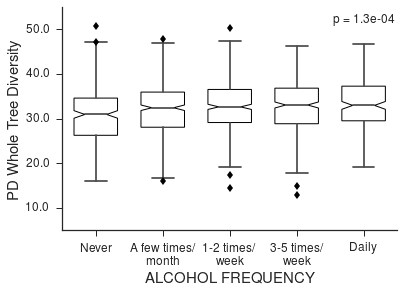

In [7]:
div.pretty_pandas_boxplot(meta=fecal_data.map_,
                          group=group.name,
                          metric='%s_%s' % (metric, rarefaction_depth),
                          order=group.order,
                          bw=True,
                          ylim=[5, 55],
                          xlabel=group.clean_name,
                          xticklabels=group.order,
                          ylabel='PD Whole Tree Diversity',
                          show_p=True
                         )

We can also examine significant differences using a post-hoc test to see what drives these differences.

In [8]:
div.post_hoc_pandas(meta=fecal_data.map_,
                    group=group.name,
                    cat='%s_%s'% (metric, rarefaction_depth),
                    order=group.order,
                    correct='fdr_bh'
                   )

,Counts,Mean,Median,Stdv,Never,A few times/month,1-2 times/week,3-5 times/week
ALCOHOL_FREQUENCY,,,,,,,,
Never,240,30.889943,30.916529,6.402433,NaN,NaN,NaN,NaN
A few times/month,396,32.211963,32.415365,5.812173,0.006852,NaN,NaN,NaN
1-2 times/week,401,32.798563,32.615696,5.682771,0.000221,0.381285,NaN,NaN
3-5 times/week,346,32.622247,33.033849,5.714327,0.000717,0.416289,0.855645,NaN
Daily,194,33.193276,32.943651,5.409528,0.000221,0.173053,0.529245,0.524521
